# Principles of Finance Portfolio Performance Project, COVID 19

Modern portfolio theory (MPT) is a theory on how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. According to the theory, it's possible to construct an "efficient frontier" of optimal portfolios offering the maximum possible expected return for a given level of risk.

MPT shows that an investor can construct a portfolio of multiple assets that will maximize returns for a given level of risk. Likewise, given a desired level of expected return, an investor can construct a portfolio with the lowest possible risk. Based on statistical measures such as variance and correlation, an individual investment's return is less important than how the investment behaves in the context of the entire portfolio.

##### Stocks mentioned in this portfolio should not be taken as a recommendation to buy or sell any security. This portfolio was created for a class project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

pd.options.display.float_format = '{:.2f}'.format

In [2]:
PF_Stocks = pd.read_csv("PF_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]

In [3]:
PF_Stocks = PF_Stocks.loc["2020-2-23":"2020-5-22"]

In [4]:
PF_Stocks.tail().dropna()

,AAPL,JNJ,MSFT,SQ,WM
Date,,,,,
2020-05-18,314.96,149.48,184.40,76.63,99.66
2020-05-19,313.14,147.99,183.12,79.25,98.33
2020-05-20,319.23,146.66,185.66,82.04,99.45
2020-05-21,316.85,145.70,183.43,81.49,98.93


In [5]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

Daily Returns since the impact of COVID-19:

In [6]:
ret = PF_Stocks.pct_change().dropna()

In [7]:
ret.tail().dropna()

,AAPL,JNJ,MSFT,SQ,WM
Date,,,,,
2020-05-18,0.02,0.00,0.01,-0.05,0.04
2020-05-19,-0.01,-0.01,-0.01,0.03,-0.01
2020-05-20,0.02,-0.01,0.01,0.04,0.01
2020-05-21,-0.01,-0.01,-0.01,-0.01,-0.01
2020-05-22,0.00,0.00,0.00,0.00,0.00


Risk and Return due to the impact of COVID-19:

In [8]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,0.49,0.69
JNJ,0.16,0.54
MSFT,0.55,0.72
SQ,0.73,1.13
WM,-0.70,0.61


Plot Risk and Returns:

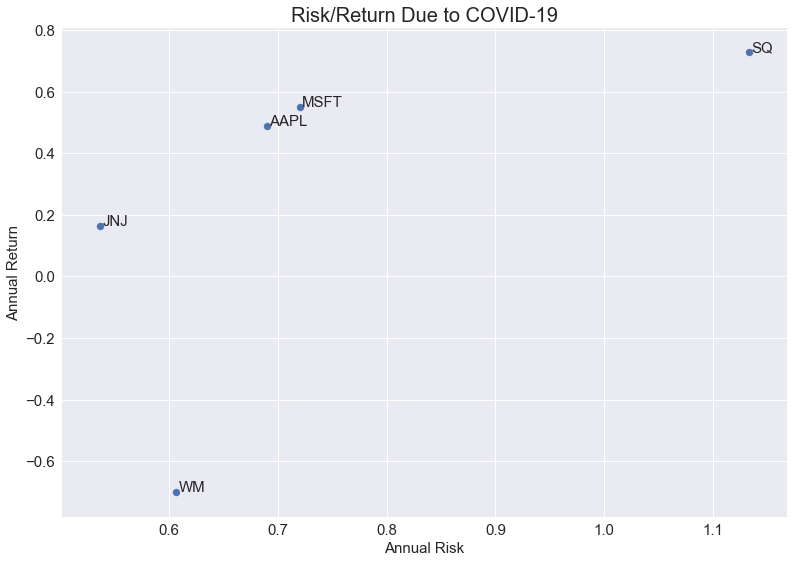

In [9]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Annual Risk", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Risk/Return Due to COVID-19", fontsize = 20)
plt.show()

Number of stocks in the portfolio (5), and 200,000 simulations of portfolios:

In [10]:
noa = len(PF_Stocks.columns)
nop = 200000
print(noa, nop)

5 200000


Creating simulation:

In [11]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [12]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [13]:
weights

array([[0.28080675, 0.11536743, 0.09146337, 0.2222825 , 0.29007995],
       [0.14285692, 0.3311435 , 0.23122471, 0.162381  , 0.13239387],
       [0.17433282, 0.37035383, 0.22279264, 0.03031609, 0.20220461],
       ...,
       [0.01689438, 0.35207522, 0.20449079, 0.14138689, 0.28515271],
       [0.19680928, 0.12189131, 0.23803707, 0.22229211, 0.22097022],
       [0.2563989 , 0.25351938, 0.20632194, 0.14361847, 0.14014131]])

In [14]:
weights.sum(axis = 1, keepdims= True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

Daily Returns of 200,000 portfolios:

In [15]:
port_ret = ret.dot(weights.T)

In [16]:
port_ret.tail()

,0,1,2,3,4,5,6,7,8,9,...,199990,199991,199992,199993,199994,199995,199996,199997,199998,199999
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-18,0.01,0.00,0.01,0.01,0.01,0.01,0.00,-0.00,0.01,0.01,...,0.00,-0.00,0.01,0.02,0.00,-0.00,0.01,0.01,0.01,0.01
2020-05-19,0.00,-0.00,-0.01,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,...,-0.00,0.00,-0.00,-0.01,0.00,0.00,-0.00,-0.00,0.00,-0.00
2020-05-20,0.02,0.01,0.01,0.02,0.01,0.01,0.01,0.02,0.02,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.02,0.01
2020-05-21,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
2020-05-22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Annual Risk and Return of 200,000 Portfolios

In [17]:
port_summary = ann_risk_return(port_ret)

In [18]:
port_summary.tail()

,Return,Risk
199995,0.35,0.66
199996,0.30,0.68
199997,0.08,0.59
199998,0.25,0.67
199999,0.29,0.63


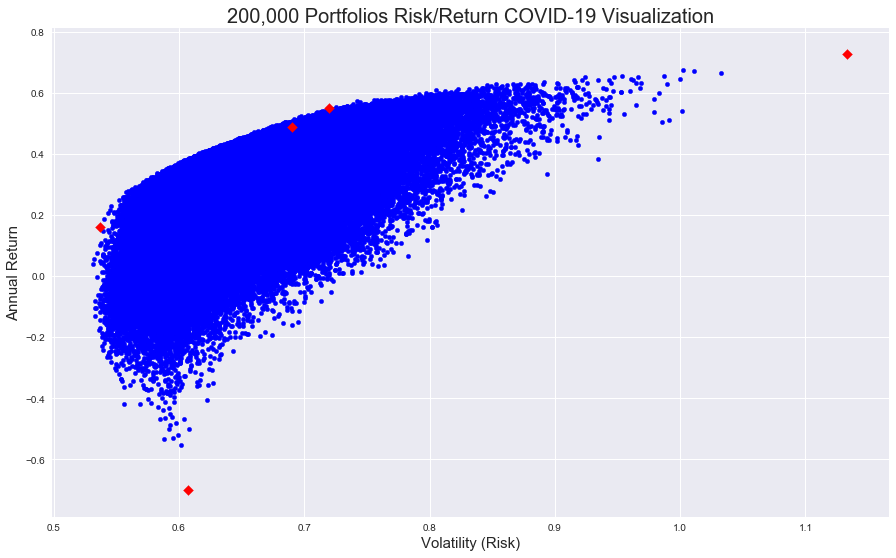

In [19]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "blue")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "red", marker = "D")
plt.xlabel('Volatility (Risk)', fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("200,000 Portfolios Risk/Return COVID-19 Visualization", fontsize = 20)
plt.show()

## Portfolio Analysis With The Sharpe Ratio

Used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

Since the Portfolio is from Feb 23 2020 to May 22 2020, we're going to be using the 3 month government bond, which is at 0.11% as the Risk Free rate. https://www.bloomberg.com/markets/rates-bonds/government-bonds/us use this website to track the treasury yields.

In [20]:
risk_free_return = 0.011
risk_free_risk = 0

In [21]:
rf = [risk_free_return, risk_free_risk]
rf

[0.011, 0]

Sharpe Ratios for stocks in the portfolio:

In [22]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe
AAPL,0.49,0.69,0.69
JNJ,0.16,0.54,0.28
MSFT,0.55,0.72,0.75
SQ,0.73,1.13,0.63
WM,-0.70,0.61,-1.17


Notice that due to COVID-19, Waste Management has a negative sharpe ratio, this means that it is expected to achieve negative returns from WM

200,000 Portfolio Sharpe Ratios: portfolio sharpe ratio of 1 are "expectional",  portfolio sharpe ratio of 2 are really good, and portfolio sharpe ratios of 3 are beyond great.

In [23]:
port_summary["Sharpe"] = (port_summary["Return"].sub(rf[0]))/port_summary["Risk"]

In [24]:
port_summary.tail()

,Return,Risk,Sharpe
199995,0.35,0.66,0.52
199996,0.30,0.68,0.43
199997,0.08,0.59,0.12
199998,0.25,0.67,0.36
199999,0.29,0.63,0.44


In [25]:
port_summary.describe()

,Return,Risk,Sharpe
count,200000.00,200000.00,200000.00
mean,0.25,0.65,0.35
std,0.14,0.05,0.20
min,-0.55,0.53,-0.94
25%,0.15,0.62,0.22
50%,0.25,0.65,0.36
75%,0.35,0.68,0.51
max,0.68,1.03,0.76


out of 200,000 portfolio simulations, our maximum results lead to an 68% return, 103% risk and sharpe ratio of 0.76. The best performing portfolios usually have a Sharpe Ratios with 1 or above which is ideal to look for. In over all risk of this portfolio combination is greater then return. 

Plot 200,000 Portfolio Sharpe Ratio Performances. "vmin" comes from "25%", "vmax" comes from max sharpe ratio, and "alpha" comes from "max return" this is also a trial and erro process to get the most out of the chart. data inputs comform the describe chart.

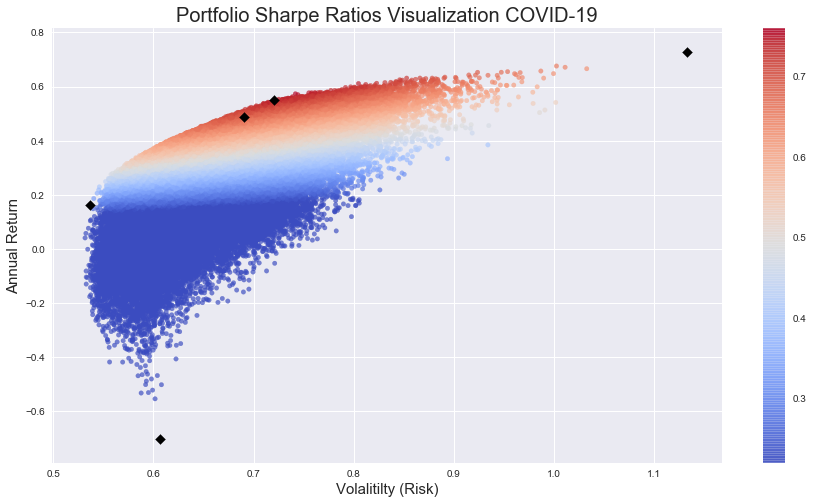

In [26]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.22, vmax = 0.76, alpha = 0.68)
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("Volalitilty (Risk)", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Portfolio Sharpe Ratios Visualization COVID-19", fontsize = 20)
plt.show()

## The Optimal Portfolio - "Max Sharpe Ratio Portfolio"

out of 200,000 portfolios, the Max sharpe ratio portfolio, is portfolio 123,054

In [27]:
msrp = port_summary.Sharpe.idxmax()
msrp

123054

Retults of the Max Sharpe Ratio Portfolio:

In [28]:
port_summary.loc[msrp]

Return   0.57
Risk     0.74
Sharpe   0.76
Name: 123054, dtype: float64

In [29]:
msrp_w = weights[msrp, :]
msrp_w

array([1.35907684e-01, 1.55231063e-04, 6.83214862e-01, 1.80323854e-01,
       3.98368620e-04])

out of 200,000 portfolio, "The Best Portfolio" consist of the following combinations

In [30]:
pd.Series(index = PF_Stocks.columns, data = msrp_w)

AAPL   0.14
JNJ    0.00
MSFT   0.68
SQ     0.18
WM     0.00
dtype: float64

Notice the Max Sharpe Ratio Portfolio has 0% in WM and 0% in JNJ

## Systematic and Unsystematic Risk 

Systematic risk refers to the risk inherent to the entire market or market segment. Systematic risk, also known as “undiversifiable risk,” “volatility” or “market risk,” affects the overall market, not just a particular stock or industry. This type of risk is both unpredictable and impossible to completely avoid. It cannot be mitigated through diversification, only through hedging or by using the correct asset allocation strategy.

Unsystematic risk is unique to a specific company or industry. Also known as “nonsystematic risk,” "specific risk," "diversifiable risk" or "residual risk," in the context of an investment portfolio, unsystematic risk can be reduced through diversification.

In [31]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2)
summary

,Return,Risk,Sharpe,TotalRisk_var
AAPL,0.49,0.69,0.69,0.48
JNJ,0.16,0.54,0.28,0.29
MSFT,0.55,0.72,0.75,0.52
SQ,0.73,1.13,0.63,1.28
WM,-0.70,0.61,-1.17,0.37


In [32]:
COV = ret.cov()*252
COV

,AAPL,JNJ,MSFT,SQ,WM
AAPL,0.48,0.29,0.47,0.54,0.31
JNJ,0.29,0.29,0.30,0.32,0.25
MSFT,0.47,0.30,0.52,0.58,0.32
SQ,0.54,0.32,0.58,1.28,0.36
WM,0.31,0.25,0.32,0.36,0.37


In [33]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [34]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AAPL,0.49,0.69,0.69,0.48,0.31,0.16
JNJ,0.16,0.54,0.28,0.29,0.25,0.04
MSFT,0.55,0.72,0.75,0.52,0.32,0.20
SQ,0.73,1.13,0.63,1.28,0.36,0.92
WM,-0.70,0.61,-1.17,0.37,0.37,0.00


### Systematic and Unsystematic Risk bar graph

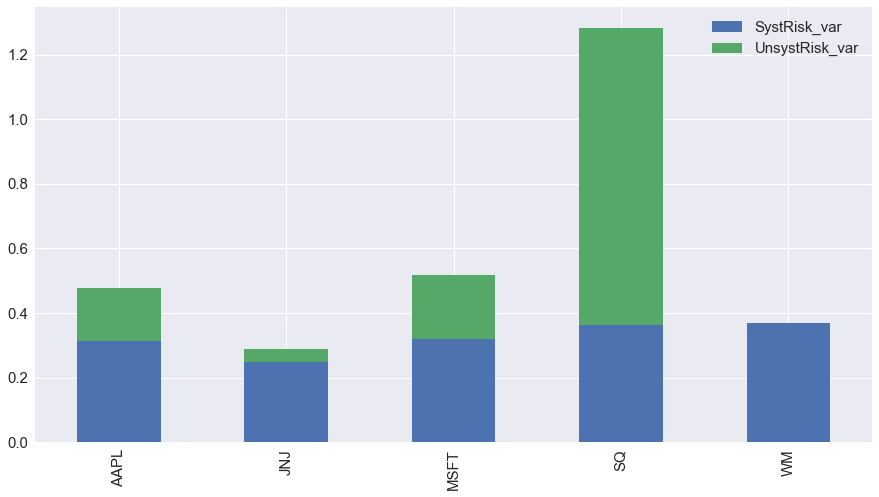

In [35]:
summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In general we want a balance between systematic and unsystematic risk. Systematic risk has to do with the stock getting affected by the overall market, and the stock in the portfolio that gets affected by the market condidtions the most due to COVID-19 is Waste Management and secondly Johnson & Johnson. the stocks that have the highest Unsystematic risk also company specific risk are SQ and Microsoft. Microsoft, Apple, and SQ are all stocks that have very similar systematic risk, which could also mean they have a similar correlation to the market.

## Including the Market Portfolio

A market portfolio is a theoretical bundle of investments that includes every type of asset available in the investment universe, with each asset weighted in proportion to its total presence in the market. The expected return of a market portfolio is identical to the expected return of the market as a whole.

A market portfolio, by nature of being completely diversified, is subject only to systematic risk, or risk that affects the market as a whole, and not to unsystematic risk, which is the risk inherent to a particular asset class.

In [36]:
PF_Stocks = pd.read_csv("PF_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]
SP500_Index =  pd.read_csv("SP500.csv", index_col = "Date", parse_dates = ["Date"])["Adj Close"].to_frame()

In [37]:
PF_Stocks = PF_Stocks.loc["2020-2-23":"2020-5-22"]
SP500_Index = SP500_Index.loc["2020-2-23":"2020-5-22"]

Closing Prices of the S&P 500 index:

In [38]:
SP500_Index.tail().dropna()

,Adj Close
Date,
2020-05-18,2953.91
2020-05-19,2922.94
2020-05-20,2971.61
2020-05-21,2948.51
2020-05-22,2955.45


In [39]:
PF_Stocks["MP"] = SP500_Index["Adj Close"]

In [40]:
PF_Stocks.tail().dropna()

,AAPL,JNJ,MSFT,SQ,WM,MP
Date,,,,,,
2020-05-18,314.96,149.48,184.40,76.63,99.66,2953.91
2020-05-19,313.14,147.99,183.12,79.25,98.33,2922.94
2020-05-20,319.23,146.66,185.66,82.04,99.45,2971.61
2020-05-21,316.85,145.70,183.43,81.49,98.93,2948.51


Daily Returns:

In [41]:
ret = PF_Stocks.pct_change().dropna()

In [42]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

Risk and Return including the market portfolio (MP) do to COVID-19:

In [43]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,0.49,0.69
JNJ,0.16,0.54
MSFT,0.55,0.72
SQ,0.73,1.13
WM,-0.70,0.61
MP,-0.16,0.62


Risk/Return Including the Market Portfolio:

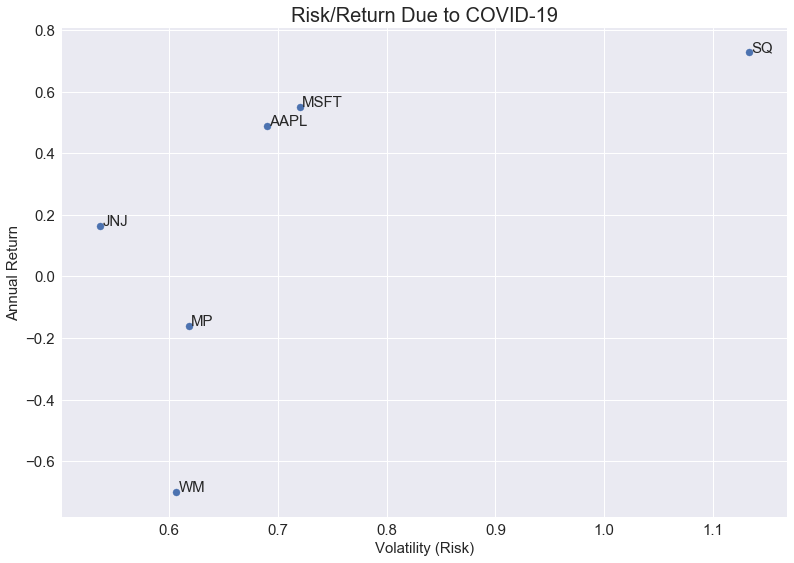

In [44]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Volatility (Risk)", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Risk/Return Due to COVID-19", fontsize = 20)
plt.show()

Calculating the Sharpe Ratio including the Market Portfolio (MP):

In [45]:
risk_free_return = 0.011
risk_free_risk = 0

In [46]:
rf = [risk_free_return, risk_free_risk]
rf

[0.011, 0]

In [47]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe
AAPL,0.49,0.69,0.69
JNJ,0.16,0.54,0.28
MSFT,0.55,0.72,0.75
SQ,0.73,1.13,0.63
WM,-0.70,0.61,-1.17
MP,-0.16,0.62,-0.28


Notice that the Market Porfolo has a negative sharpe ratio, this generally moves we're expecting negative returns.

In [48]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2)
summary

,Return,Risk,Sharpe,TotalRisk_var
AAPL,0.49,0.69,0.69,0.48
JNJ,0.16,0.54,0.28,0.29
MSFT,0.55,0.72,0.75,0.52
SQ,0.73,1.13,0.63,1.28
WM,-0.70,0.61,-1.17,0.37
MP,-0.16,0.62,-0.28,0.38


In [49]:
COV = ret.cov()*252
COV

,AAPL,JNJ,MSFT,SQ,WM,MP
AAPL,0.48,0.29,0.47,0.54,0.31,0.40
JNJ,0.29,0.29,0.30,0.32,0.25,0.27
MSFT,0.47,0.30,0.52,0.58,0.32,0.42
SQ,0.54,0.32,0.58,1.28,0.36,0.55
WM,0.31,0.25,0.32,0.36,0.37,0.31
MP,0.40,0.27,0.42,0.55,0.31,0.38


In [51]:
summary["SystRisk_var"] = COV.iloc[:, -1]

Systematic and Unsystematic risk of stocks including the Market Portfolio:

In [52]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AAPL,0.49,0.69,0.69,0.48,0.40,0.07
JNJ,0.16,0.54,0.28,0.29,0.27,0.02
MSFT,0.55,0.72,0.75,0.52,0.42,0.10
SQ,0.73,1.13,0.63,1.28,0.55,0.73
WM,-0.70,0.61,-1.17,0.37,0.31,0.06
MP,-0.16,0.62,-0.28,0.38,0.38,0.00


### Systematic and Unsystematic bar graph including the Market Portfolio 

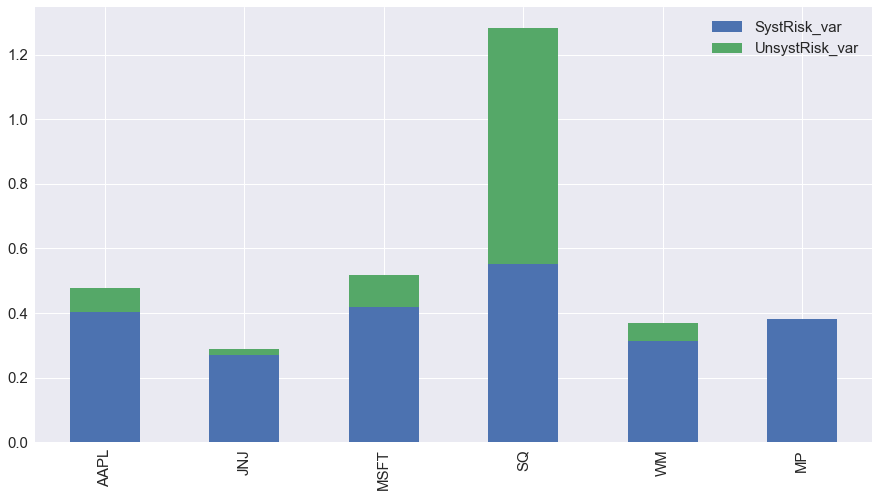

In [53]:
summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Determining the beta of the stocks in the portfolio compared to the Market Portfolio:

In [54]:
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
AAPL,0.49,0.69,0.69,0.48,0.40,0.07,1.05
JNJ,0.16,0.54,0.28,0.29,0.27,0.02,0.70
MSFT,0.55,0.72,0.75,0.52,0.42,0.10,1.10
SQ,0.73,1.13,0.63,1.28,0.55,0.73,1.45
WM,-0.70,0.61,-1.17,0.37,0.31,0.06,0.82
MP,-0.16,0.62,-0.28,0.38,0.38,0.00,1.00


## Security Market Line 

The security market line is an investment evaluation tool derived from the CAPM—a model that describes risk-return relationship for securities—and is based on the assumption that investors need to be compensated for both the time value of money (TVM) and the corresponding level of risk associated with any investment, referred to as the risk premium.

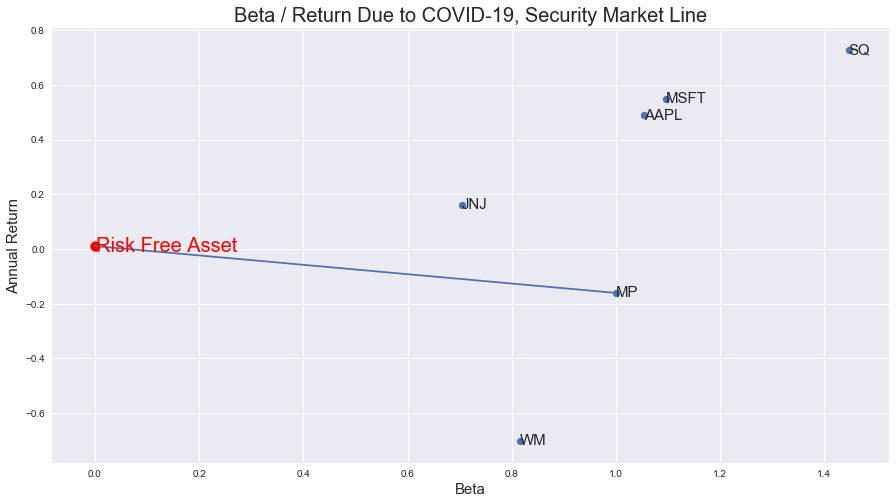

In [55]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["MP", "beta"]], [rf[0], summary.loc["MP", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "red")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "Red")
plt.xlabel("Beta", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Beta / Return Due to COVID-19, Security Market Line", fontsize = 20)
plt.show()

Security Market Line Analysis: since Waste Management(WM) falls below the SML this is an indictor that WM is underforming the market. JNJ, AAPL, MSFT, and SQ are all far outperforming the Market.

### Including the Capital Asset Pricing Model and Alpha of the stocks with the Market Portfolio

The Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk and expected return for assets, particularly stocks. CAPM is widely used throughout finance for pricing risky securities and generating expected returns for assets given the risk of those assets and cost of capital.

"Alpha" (the Greek letter α) is a term used in investing to describe a strategy's ability to beat the market, or it's "edge." Alpha is thus also often referred to as “excess return” or “abnormal rate of return,” which refers to the idea that markets are efficient, and so there is no way to systematically earn returns that exceed the broad market as a whole. Alpha is often used in conjunction with beta (the Greek letter β) , which measures the broad market's overall volatility or risk, known as systematic market risk.

In [56]:
summary["capm_ret"] = rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.beta

In [57]:
summary["alpha"] = summary.Return - summary.capm_ret
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AAPL,0.49,0.69,0.69,0.48,0.40,0.07,1.05,-0.17,0.66
JNJ,0.16,0.54,0.28,0.29,0.27,0.02,0.70,-0.11,0.27
MSFT,0.55,0.72,0.75,0.52,0.42,0.10,1.10,-0.18,0.73
SQ,0.73,1.13,0.63,1.28,0.55,0.73,1.45,-0.24,0.97
WM,-0.70,0.61,-1.17,0.37,0.31,0.06,0.82,-0.13,-0.57
MP,-0.16,0.62,-0.28,0.38,0.38,0.00,1.00,-0.16,0.00


CAPM and Alpha Analysis: Since we know that the CAPM is used for determining expected returns on stocks, we can notice that each stock is expected to reach above -10% losses, with SQ and MSFT being the the highest expected losses in this portfolio since they have the highest beta's. Understanding that Alpha is used to determine whether or not a stock would beat the overall market. We can notice that Waste Management (WM) is the only stock in the Portfolio that will not beat the over all market which makes since, because it falls below the Security Market Line.  